In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualizations
import os
from faker import Faker
import csv
import random
fake = Faker('en_US')
Faker.seed(0)
from matplotlib import pyplot as plt
import warnings
warnings.simplefilter("ignore")

In [3]:
df1 = pd.read_csv('C:/Users/harini/Desktop/NEUCourses/ADM/Project/2019-Dec.csv')
df2 = pd.read_csv('C:/Users/harini/Desktop/NEUCourses/ADM/Project/2019-Nov.csv')
df3 = pd.read_csv('C:/Users/harini/Desktop/NEUCourses/ADM/Project/2019-Oct.csv')
df4 = pd.read_csv('C:/Users/harini/Desktop/NEUCourses/ADM/Project/2020-Jan.csv')
df5 = pd.read_csv('C:/Users/harini/Desktop/NEUCourses/ADM/Project/2020-Feb.csv')

In [4]:
df = pd.concat([df1,df2,df3,df4,df5], ignore_index=True)

In [5]:
df.columns

Index(['event_time', 'event_type', 'product_id', 'category_id',
       'category_code', 'brand', 'price', 'user_id', 'user_session'],
      dtype='object')

In [6]:
df.shape

(20692840, 9)

In [6]:
df.isnull().sum()

event_time              0
event_type              0
product_id              0
category_id             0
category_code    20339246
brand             8757117
price                   0
user_id                 0
user_session         4598
dtype: int64

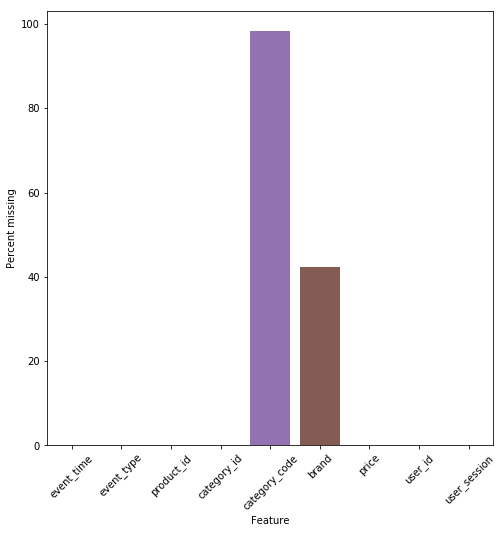

In [7]:
# Deal with missing values. First, calculate the percentage of
# missing values for every column, and plot them as a bar chart

null_vals = df.isnull().sum()/len(df)*100
null_vals = pd.DataFrame(null_vals)
null_vals.reset_index(inplace = True)
null_vals.columns = ["Feature","Percent missing"]
plt.figure(figsize = (8,8))
plt.xticks(rotation=45)
sns.barplot(x = "Feature",y ="Percent missing",data = null_vals)

In [7]:
# deleting rows with null values in brand and user session

df = df[df['brand'].notna()]
df = df[df['user_session'].notna()]

In [8]:
df.shape

(11932754, 9)

In [10]:
df.isnull().sum()

event_time              0
event_type              0
product_id              0
category_id             0
category_code    11666045
brand                   0
price                   0
user_id                 0
user_session            0
dtype: int64

In [9]:
user_df = pd.DataFrame(df['user_id'].unique())

In [10]:
user_df.shape

(1204164, 1)

In [11]:
user_df.columns = ['user_id']

In [12]:
# Generating User Profiles

user_df['Street Address'] = [fake.street_address() for i in range(len(df['user_id'].unique()))]
user_df['City'] = [fake.city() for i in range(len(df['user_id'].unique()))]
user_df['State'] = [fake.state() for i in range(len(df['user_id'].unique()))]
user_df['ZipCode'] = [fake.zipcode() for i in range(len(df['user_id'].unique()))]

In [15]:
user_df.head()

,user_id,Street Address,City,State,ZipCode
0,576802932,604 Tucker Valley Suite 759,Sharonhaven,Ohio,67847
1,412120092,24219 Archer Mountain Suite 924,South Ryan,New Hampshire,82353
2,494077766,57815 Cheryl Unions,Vanessaburgh,Oklahoma,97659
3,348405118,8408 Davis Streets Suite 097,Port Tamara,New Mexico,91720
4,560109803,51393 Tammy Squares Apt. 158,Kristopherchester,Minnesota,76138


#### Creating campaigns and Promotions



In [69]:
campaigns = ['Social Media','Web Search','E-mail', 'Referal']
promotions = ['Discount','Free Sample','No Promotion','Buy One Get One']
channels = ['Desktop','Phone']

In [17]:
session_df = pd.DataFrame(df['user_session'].unique())
session_df.columns = ['user_session']

In [19]:
len(pd.DataFrame(df['user_session'].unique()).drop_duplicates())

3066720

In [20]:
df_len = len(session_df)

In [38]:
# funtion to generate randon fractions summing to 1
# These fractions are used to split the data

def sum_to_one(n):
    values = [0.0, 1.0] + [round(random.random(),2) for _ in range(n - 1)]
    values.sort()
    return [round(values[i+1] - values[i],2) for i in range(n)]


In [45]:
camp_parts = sum_to_one(4)

In [48]:
camp_parts

[0.41, 0.04, 0.38, 0.17]

In [49]:
index_list = session_df.index.values.tolist()

In [50]:
len(index_list)

3066720

In [51]:
camp = [int(round(i * df_len)) for i in camp_parts]

In [52]:
from itertools import islice 
Inputt = iter(index_list) 
Output = [list(islice(Inputt, elem)) 
          for elem in camp] 

In [54]:
a = session_df.iloc[Output[0]]
b = session_df.iloc[Output[1]]
c = session_df.iloc[Output[2]]
d = session_df.iloc[Output[3]]

In [55]:
print(len(a)+len(b)+len(c)+len(d))
print(len(a),len(b),len(c),len(d))

3066720
1257355 122669 1165354 521342


In [56]:
a['campaign'] = campaigns[0]
b['campaign'] = campaigns[1]
c['campaign'] = campaigns[2]
d['campaign'] = campaigns[3]

In [57]:
session_df = pd.concat([a,b,c,d], ignore_index=True)

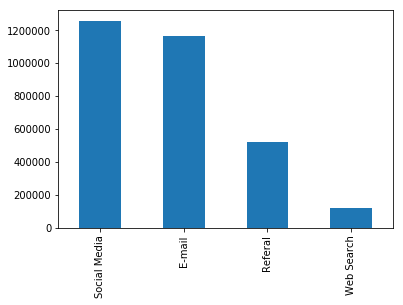

In [58]:
session_df.campaign.value_counts().plot(kind='bar')

In [62]:
session_df.columns

Index(['user_session', 'campaign'], dtype='object')

In [67]:
prom_parts = sum_to_one(4)

In [68]:
prom_parts

[0.42, 0.08, 0.23, 0.27]

In [71]:
prom = [int(round(i * df_len)) for i in prom_parts]

In [78]:
random.shuffle(index_list)

In [79]:
Inputt = iter(index_list) 
Output = [list(islice(Inputt, elem)) 
          for elem in prom] 

In [83]:
a = session_df.iloc[Output[0]]
b = session_df.iloc[Output[1]]
c = session_df.iloc[Output[2]]
d = session_df.iloc[Output[3]]

In [84]:
print(len(a)+len(b)+len(c)+len(d))
print(len(a),len(b),len(c),len(d))

3066720
1288022 245338 705346 828014


In [85]:
a['promotion'] = promotions[0]
b['promotion'] = promotions[1]
c['promotion'] = promotions[2]
d['promotion'] = promotions[3]

In [86]:
session_df = pd.concat([a, b,c,d], ignore_index=True)

In [176]:
# session_df = session_df.sample(frac=1)
# a = session_df.sample(frac=prom_parts[0], replace=False, random_state=1)
# b = session_df.sample(frac=prom_parts[1], replace=False, random_state=1)
# c = session_df.sample(frac=prom_parts[2], replace=False, random_state=1)
# d = session_df.sample(frac=prom_parts[3], replace=False, random_state=1)

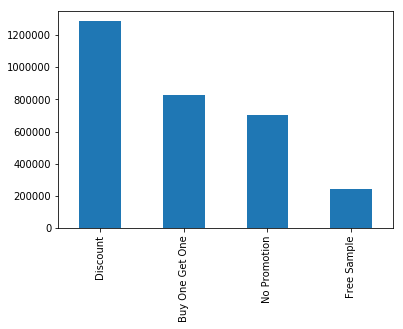

In [88]:
session_df.promotion.value_counts().plot(kind='bar')

In [89]:
session_df.head()

,user_session,campaign,promotion
0,a905a403-16d3-b9a6-91b2-b881bab7e2fc,Referal,Discount
1,a6a34d87-d8b6-42f2-96f0-cab75219d3d5,Referal,Discount
2,3c089e7f-ac98-4679-aa0a-69e5313bce1a,Social Media,Discount
3,227cdacd-d4dd-0ea7-6ecb-c53535a4ac47,Referal,Discount
4,362d1c74-a642-4403-8d28-cd272429c2d7,Referal,Discount


In [90]:
session_df.shape

(3066720, 3)

In [95]:
session_df.groupby(['campaign','promotion']).count()

user_session
campaign     promotion                    
E-mail       Buy One Get One        314474
             Discount               489805
             Free Sample             93045
             No Promotion           268030
Referal      Buy One Get One        140818
             Discount               218787
             Free Sample             42009
             No Promotion           119728
Social Media Buy One Get One        339306
             Discount               527847
             Free Sample            100575
             No Promotion           289627
Web Search   Buy One Get One         33416
             Discount                51583
             Free Sample              9709
             No Promotion            27961

In [97]:
channel_parts = sum_to_one(2)
channel_parts

[0.38, 0.62]

In [98]:
random.shuffle(index_list)
chan = [int(round(i * df_len)) for i in channel_parts]
Inputt = iter(index_list) 
Output = [list(islice(Inputt, elem)) 
          for elem in chan] 

In [100]:
a = session_df.iloc[Output[0]]
b = session_df.iloc[Output[1]]

In [101]:
print(len(a),len(b))
print(len(a)+len(b))

1165354 1901366
3066720


In [102]:
a['channel'] = channels[0]
b['channel'] = channels[1]

In [185]:
# session_df = session_df.sample(frac=1)
# a = session_df.sample(frac=channel_parts[0], replace=False, random_state=1)
# b = session_df.sample(frac=channel_parts[1], replace=False, random_state=1)
# a['channel'] = channels[0]
# b['channel'] = channels[1]

In [103]:
session_df = pd.concat([a, b], ignore_index=True)

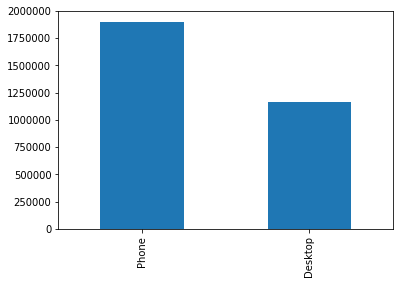

In [104]:
session_df.channel.value_counts().plot(kind='bar')

In [107]:
discount_sessions = session_df[session_df['promotion'] == 'Discount']

In [108]:
non_discount_sessions = session_df[session_df['promotion'] != 'Discount']

In [109]:
discount_sessions['discount'] = [fake.random_int(0,32) for i in range(len(discount_sessions))]

In [110]:
discount_sessions['discount']=discount_sessions['discount'].apply(lambda x : 10 if (x>=0 and x<=9)  
                                                                              else 15 if (x>=10 and x<=23)  
                                                                              else 20 if (x>=24 and x<=32)  
                                                                              else x)

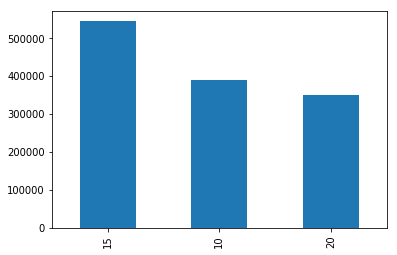

In [111]:
discount_sessions.discount.value_counts().plot(kind='bar')

In [112]:
non_discount_sessions['discount'] = 0

In [113]:
session_df = pd.concat([discount_sessions, non_discount_sessions], ignore_index=True)

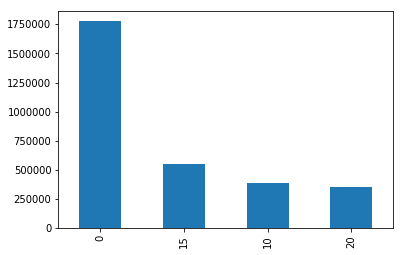

In [114]:
session_df.discount.value_counts().plot(kind='bar')

In [115]:
session_df[session_df.user_session== '00000dd2-0f5d-4fc9-9d6b-2fc8c7514b04']

,user_session,campaign,promotion,channel,discount
1771095,00000dd2-0f5d-4fc9-9d6b-2fc8c7514b04,Social Media,Buy One Get One,Desktop,0


In [116]:
session_df.groupby(['user_session','campaign']).count()

,,promotion,channel,discount
user_session,campaign,,,
0000061d-f3e9-484b-8c73-e54f355032a3,E-mail,1,1,1
00000ac8-0015-4f12-996a-be2896323738,E-mail,1,1,1
00000dd2-0f5d-4fc9-9d6b-2fc8c7514b04,Social Media,1,1,1
000013d6-68a4-40cf-9452-6577dbfab515,E-mail,1,1,1
00001bc6-1e04-4861-be5d-1bc73929c21a,Social Media,1,1,1
00001ca1-f2df-4572-b0b8-e752e2064aae,E-mail,1,1,1
00002b0e-d7f7-454e-8386-431c4021a9f6,Social Media,1,1,1
00002db7-16b6-4db2-bf8b-7a1cb6bd0e7f,E-mail,1,1,1
00002f36-401d-4bc5-bac6-1a683f52ac2b,Social Media,1,1,1


In [13]:
df = pd.read_csv('C:/Users/harini/Desktop/NEUCourses/ADM/Project/e_commerce_synthetic_data.csv')

In [14]:
rating_df = df[['user_id','product_id']]

In [15]:
rating_df = rating_df.drop_duplicates().reset_index(drop = True)

In [16]:
rating_df['ratings'] = [fake.random_int(1,5) for i in range(len(rating_df))]

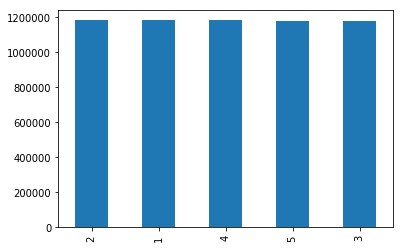

In [17]:
rating_df.ratings.value_counts().plot(kind='bar')

In [19]:
df = df.drop('ratings', axis = 1)

In [20]:
df = pd.merge(rating_df,df, on= ['user_id', 'product_id'])

In [148]:
df_final = pd.merge(user_df,df, on='user_id')
df_final = pd.merge(session_df,df_final, on='user_session')
df_final = pd.merge(rating_df,df_final, on= ['user_id', 'product_id'])

In [149]:
df_final['selling_price'] = df_final['price'] - (df_final['discount']/100*df_final['price'])

In [150]:
df_final.head()

,user_id,product_id,ratings,user_session,campaign,promotion,channel,discount,Street Address,City,State,ZipCode,event_time,event_type,category_id,category_code,brand,price,selling_price
0,576802932,5712790,1,51d85cb0-897f-48d2-918b-ad63965c12dc,Social Media,Discount,Desktop,15,604 Tucker Valley Suite 759,Sharonhaven,Ohio,67847,2019-12-01 00:00:00 UTC,remove_from_cart,1487580005268456287,NaN,f.o.x,6.27,5.3295
1,576802932,5712790,1,792333bf-15c7-473e-a0e9-04f4e1a1bc34,Social Media,Discount,Phone,20,604 Tucker Valley Suite 759,Sharonhaven,Ohio,67847,2019-11-30 21:15:29 UTC,cart,1487580005268456287,NaN,f.o.x,6.08,4.8640
2,576802932,5712790,1,7cef0bfa-ac71-4926-8ed8-098353cc991c,Social Media,No Promotion,Phone,0,604 Tucker Valley Suite 759,Sharonhaven,Ohio,67847,2019-11-30 23:58:42 UTC,view,1487580005268456287,NaN,f.o.x,6.27,6.2700
3,576802932,5712790,1,b9405308-54cd-4ac9-b13e-94878d36fe1b,Social Media,No Promotion,Phone,0,604 Tucker Valley Suite 759,Sharonhaven,Ohio,67847,2019-11-30 23:59:03 UTC,view,1487580005268456287,NaN,f.o.x,6.27,6.2700
4,412120092,5764655,3,8adff31e-2051-4894-9758-224bfa8aec18,Social Media,Discount,Phone,10,24219 Archer Mountain Suite 924,South Ryan,New Hampshire,82353,2019-12-01 00:00:00 UTC,view,1487580005411062629,NaN,cnd,29.05,26.1450


In [151]:
df_final.isnull().sum()

user_id                  0
product_id               0
ratings                  0
user_session             0
campaign                 0
promotion                0
channel                  0
discount                 0
Street Address           0
City                     0
State                    0
ZipCode                  0
event_time               0
event_type               0
category_id              0
category_code     11666045
brand                    0
price                    0
selling_price            0
dtype: int64

In [21]:
df.to_csv('C:/Users/harini/Desktop/NEUCourses/ADM/Project/e_commerce_synthetic_data.csv', index = False)